<a href="https://colab.research.google.com/github/ethantrantalis/Data-Science-Intro/blob/master/Chapter5_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Useful Documentation

# Towards Machine Learning: A Case for Regression

Dr. Sun's **Chapter 5.1** notebook introduces the core concepts of machine learning on an interesting historic example, and provides first immesrion into the `scikit-learn` package, Python's library of machine learning methods.

In this notebook (and accompanying lecture), we discuss several topics that will enhance our understanding and appreciation of the example from **Chapter 5.1.** and will allow us to review some visualization techniques.


### Problem of the Day

In our **Case Study 2** we looked at the data about the alignment between the positions of California State Legislators with the interests of several sepcial interest groups (organizations), based on the positions the organizations took on different bills, and the votes of the lawmakers on the same.

In our initial analysis of the data, we used levels of agreement of organizations with Democratic and Republican lawmakers as the means of quantifying the lean of an organization (conservative or liberal).

Today, we will ask a different question.  Consider two organizations, for examplpe _California Teachers Associatiton_ and (to present a clear result) _California Labor Federation_.   The question we ask is this: can we, _knowing the lawmaker alignment with one of these organizations_ somehow **predict** their alignment with another?

## Prediction Problems

A **prediction problem** can be defined as follows:

Given a set of variables $X_1,\ldots, X_m$ (referred to as _independent variables_) and another variable $Y$ (referred to as a _dependent variable_), such that with any observation $\mbox{x}=(x_1,\ldots, x_m)$, there is a an associated (but possibly unknown) value $y \in \mbox{dom}(Y)$ (sometimes denoted as $y(\mbox{x})$), find a way to compute (i.e., predict(!)) the value of $y(\mbox{x})$ given any observation $\mbox{x}$. ($\mbox{dom}(X)$ here represents the set of all possible values $Y$ might take).

Ideally, the prediction is expressed in a form of a function $$f: \mbox{dom}(X_1)\times\ldots\times\mbox{dom}(X_m) \longrightarrow \mbox{dom}(Y)$$, i.e., a function that takes as input an observation $(x_1,\ldots, x_m)$ and outputs the predicted value $y$ for it.



The methodology for solving prediction problems depends on several additonal properties of the problem and the availble data.  In general, the term **Machine Learning** that you all have heard multiple times refers to a **collection of algorithmic approaches for solving prediction problems**. (Note: statisticians, and mathematicians may disagree with this definition and point out at a variety of problems considered to be part of Machine Learning that are NOT prediction problems in the strict sense of the term "prediction problem".  This is fair. We are oversimplifying here. Prediction problems are a subset of problems to which Machine Learning label is applied.)

### Supervised vs. Unsupervised Learning.

* Sometimes, a prediction problem is formulated in the following terms:
    * we have a collection of observations of the form (\mbox{x}, y), where for each observation of independent variable values $\mbox{x}$ we are given the corresponding value of $y$.  Based on this collection of data, we want to construct our predictor function $y = f(\mbox{x})$.
    
  We refer to the process of solving the prediction problems of this kind as **Supervised Learning**.  The term **"Supervised"** here refers to the fact that the input data includes information about the correspondence between certain observations $\mbox{x}$ and the values of the dependent variable. **Learning** refers to the process of establishing the solution $y = f(\mbox{x})$, often referred to as a **model** (so, we use the expression "learning a model" to indicate that we are considering a possible
  solution of a prediction problem).  The **learning** in this particular case is **supervised** because the values of the dependent variable $y$ are considered to
  provide the said "supervision" to the learning process - the model will be inferred from studying the relationship between the independent variables and the observed dependent variable values.
  
 * In contrast, there  are versions of a prediction problem, where the data available for analysis **does not include** the dependent variable values $y$ that correspond to any of the available of the observations $\mbox{x}=(x_1,\ldots,x_m)$. In such cases, the available for analysis data is a collection of independent variable observations. The nature of the prediction questions in such cases varies somewhat, but one can view many prediction problems of this kind as the problem of associating a label of some kind with each data point in the input set of observations.  Such prediction problems are often referred to as **unsupervised learning** problems.

### Regression vs Classification problems.

For the time being, we restrict our analysis to **supervised learning problems**. These problems can further be subdivided based on the nature (type) of the dependent variable $y$ whose values we need to predict.

* If $y$ is **quantitative**, the supervised learning problems are referred to as **regression problems**.

* If $y$ is **categorical**, the supervised learning problems are referred to as **classification problems**.

In this course we will cover both types of supervised learning problems, as well as some versions of unsupervised learning (specifically, problems called **clustering problems**).

We start our conversation with **regression problems**, and specifically, with a class of regression problems where **both** the dependent variable $Y$, **and** **all independent variables** $X_1,\ldots, X_m$ **are quantitative**.   (later, we will consider the case where all or some of the $X_i$ variables are categorical).

Let's us consider our first regression problem.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

We start by grabbing the Legislator Alignment CSV file, and repeating some of the actions we discussed in Case Study 2 on it to construct the `Agreement` attribute (variable).

In [3]:
filename = "http://users.csc.calpoly.edu/~dekhtyar/301-Winter2024/data/CA-Alignment2015.csv"
raw = pd.read_csv(filename)

raw1 = raw.rename(columns = {'Unnamed: 0': 'RowId'}).set_index('RowId')

raw1['Agreement'] = raw1['VotesFor'].divide(raw1['Positions'])


Let us select several organizations for consideration. Remember from our Case Study 2 exercises that we decided that some of the organizations were liberal-leaning, some - conservative-leaning, and some exhibited behavior that seemed to transcend the liberal-conservative axis in politics.  We are going to select two-three  organizations from each category.

In [7]:
## Selected organizations

selectedOrgs = ('California Labor Federation','California Immigrant Policy Center',  'California Teachers Association',          ## liberal-leaning
                 'Disability Rights California',  'Association Of California Water Agencies',                                    ## neutral (?)
                 'Howard Jarvis Taxpayers Association', 'California Building Industry Association')                              ## conservative

We will now perform some dataset manipulation, to obtain a data frame where the agreements percentages of each organization on our short-list is a separate column, and the rows represent individual lawmakers. The lawmakers will be indexed by their `PID`.

In [79]:
rawIndexed = raw1.set_index("PID")
agdc = {x:rawIndexed[rawIndexed["OrgName"]== x][['Lastname', 'Firstname','Party', "OrgName","Agreement", "Chamber"]] for x in selectedOrgs}
columns = {x:agdc[x]['Agreement'] for x in selectedOrgs}
columns['Firstname'] = agdc['California Labor Federation']['Firstname']
columns['Lastname'] = agdc['California Labor Federation']['Lastname']
columns['Party'] = agdc['California Labor Federation']['Party']
columns['Chamber'] = agdc['California Labor Federation']['Chamber']


aldf = pd.DataFrame( columns)

In [80]:
aldf

,California Labor Federation,California Immigrant Policy Center,California Teachers Association,Disability Rights California,Association Of California Water Agencies,Howard Jarvis Taxpayers Association,California Building Industry Association,Firstname,Lastname,Party,Chamber
PID,,,,,,,,,,,
1,0.981481,0.900000,0.945946,0.807692,0.720000,0.250000,0.200000,Isadore,Hall,Democrat,Senate
2,0.860465,0.947368,1.000000,0.800000,0.625000,0.450000,0.500000,Richard,Bloom,Democrat,Assembly
3,0.911111,0.955556,1.000000,0.809524,0.545455,0.411765,0.692308,Susan,Bonilla,Democrat,Assembly
4,0.960000,0.942308,0.863636,0.769231,0.625000,0.666667,0.428571,Tony,Thurmond,Democrat,Assembly
5,0.384615,0.560000,0.600000,1.000000,0.750000,0.833333,1.000000,"K.H. ""Katcho""",Achadjian,Republican,Assembly
...,...,...,...,...,...,...,...,...,...,...,...
4656,0.178571,0.294118,0.368421,0.333333,0.714286,0.750000,0.769231,Sharon,Runner,Republican,Senate
4657,0.525000,0.375000,0.466667,0.529412,0.760000,0.866667,0.809524,John,Moorlach,Republican,Senate
7492,0.800000,0.972222,0.888889,0.666667,0.727273,0.500000,0.750000,Autumn,Burke,Democrat,Assembly


#### Our first prediction problem

Consider two of these organizations, `California Teachers Association`, and `California Labor Federation`. Let us use a scatter-plot to establish whether or not there is a distinct relationship between the agreement scores of lawmakers for these two organizations.  We will use this as an opportunity to experiment a bit with the scatterplot function, and we will, at this time, use the `matplotlib` version, as it is more flexible, and allows us to control the visuals better.



In [10]:
## this is done so that we do not have to retype the constants all the time

cta = 'California Teachers Association'
clf = 'California Labor Federation'


##### matplotlib.pyplot basics

Matplotlib allows us to build a figure as a sequence of method calls. Each call adds a component to what gets visualized.  To start a figure we can call the `figure` method in the `pyplot` subpackage of `matplotlib` (under normal circumstances, **all** `matplotlib` functionality we will be using in our work comes from `pyplot`, so we typically just import the `pyplot` part of `matplotlib`)

After a figure has been created, we can start adding components to it. The components can be either specific graphs/charts (e.g., a line graph or a scatter plot), or various parts of the figure itself (title, tickmarks, etc).

Once you believe your figure is ready, display it using the `show()` method.


The simplest possible scatterplot, thus can be constructed using the following code


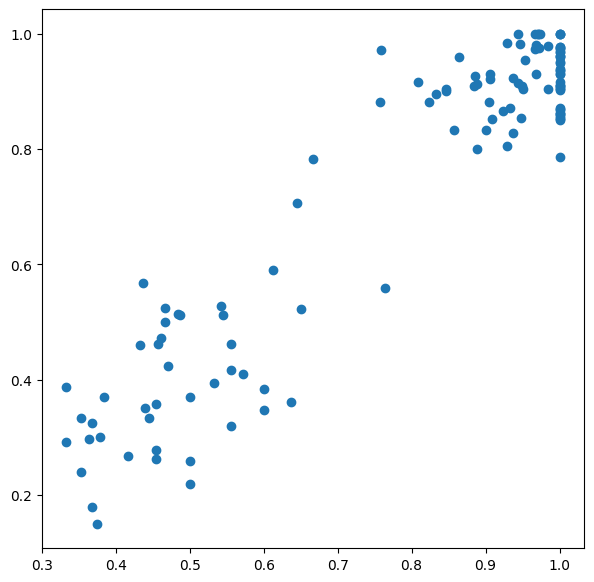

In [11]:

f1 = plt.figure(figsize=(7,7))  ### setting up the size of the figer
plt.scatter(x= aldf[cta], y=aldf[clf])
f1.show()


Each point on this scatter plot represents **one Lawmaker**. While some trends are clear, let us take a moment to make this scatter plot look nicer. We want to provide labels to the axes, somewhat untangle the mess of points in the top right corner, and color-code the points (lawmakers) by the party affilliation.

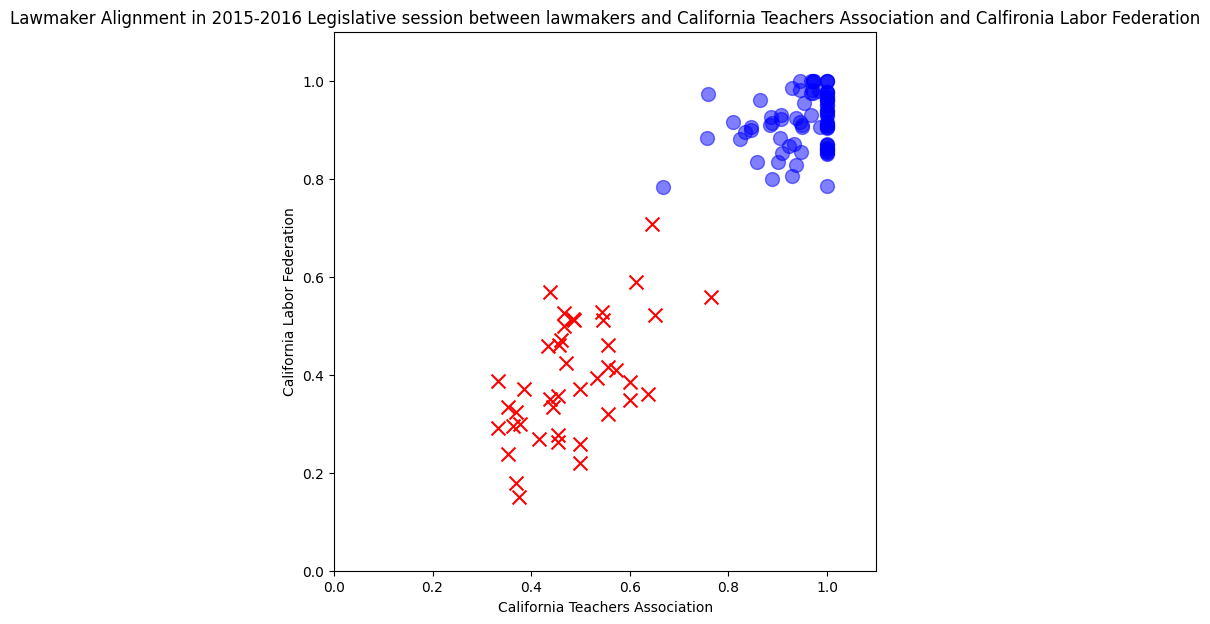

In [12]:

f1 = plt.figure(figsize=(7,7))  ### setting up the size of the figer
plt.scatter(x= aldf[aldf['Party']== 'Democrat'][cta], y=aldf[aldf['Party']=='Democrat'][clf], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican'][cta], y=aldf[aldf['Party']=='Republican'][clf], c="red", marker='x', s=100)

plt.xlim((0,1.1))  ## our values are no larger than 1.0, but we want to make sure our markers are not cut off
plt.ylim((0,1.1))
plt.xlabel('California Teachers Association')
plt.ylabel('California Labor Federation')
plt.title('Lawmaker Alignment in 2015-2016 Legislative session between lawmakers and California Teachers Association and Calfironia Labor Federation')
f1.show()


**Take a moment to record in this cell your observations about the relationship between the agreement scores for CTA and for California Labor Federation**



In [13]:
# Republicans tended to be those who agreed less between CTA and CLF

From our previous lecture, we know that we can qunatify the relationship between the two agreement scores using the correlation coefficient

In [14]:
cta_clf_corr = aldf[cta].corr(aldf[clf])

print("Correlation between Lawmaker Agreements with CTA and CLF = ", cta_clf_corr)

Correlation between Lawmaker Agreements with CTA and CLF =  0.9400943912470702


**0.94** is a pretty high correlation. This means that it the relationship is very close to perfect.

This gives us our first possible prediction method. Let us assume (as depicted in the scatter plot above) that `Lawmaker Agreement with California Teachers Association` (further referred to as `CTA` for brevity) is the independent variable here, while `Lawmaker Agreement with California Labor Federation` is the dependent variable.
Let us define our _first predictor function_ as predicting,  **that the corresponding `CLF` score for the same lawmaker with be the same as their `CTA` score**.  We represent our predictor as a Python function.

In [15]:
### our first predictor

def predictCLF(cta):
    return cta

Let us use this predictor to discuss the procedure for evaluating **how good this predictor is**.

Essentially, any function of the right number of arguments (in our case - any function of one numeric argument) can be viewed as a predictor function. Coming up with **a** predictor function is not hard. **The hard part is to discover an accurate predictor function**.

What does **"accurate"** mean in the context of prediction? Let us examine it on the example of our first lawmaker, _Isadore Hall_.


In [16]:
## Isadore Hall's CTA score:

ctaHall = aldf.loc[1][cta]

predictedClfHall = predictCLF(ctaHall)

In [17]:
print("          Isadore Hall's CTA agreement:",ctaHall)
print("Isadore Hall's predicted CFL agreement:",predictedClfHall)

          Isadore Hall's CTA agreement: 0.9459459459459459
Isadore Hall's predicted CFL agreement: 0.9459459459459459


### How can we find if we did a good job predicting?


Let us take a look at the actual agreement value between Isadore Hall and California Labor Federation.  **In a supervised learning** setting, when we start building predictors, **we have the ability to examine some of the actual values we are predicting, and to compare them to our prediction**

In [18]:
clfHall = aldf.loc[1][clf]

print("          Isadore Hall's CTA agreement:",ctaHall)
print("Isadore Hall's predicted CFL agreement:",predictedClfHall)
print("   Isadore Hall's ACTUAL CFL agreement:",clfHall)


          Isadore Hall's CTA agreement: 0.9459459459459459
Isadore Hall's predicted CFL agreement: 0.9459459459459459
   Isadore Hall's ACTUAL CFL agreement: 0.9814814814814815


We see that our prediction is **not quite precise**. We predicted a 94% agreement rate, but in reality, Isadore Hall had a 98% agreement rate.

In statistics and machine learning, we measure how good a prediction was by taking the difference between the actual value and the predicted value. This differece is often referred to as **error** or **error of prediction**.

We can compute the error of prediction now:


In [19]:

print("          Isadore Hall's CTA agreement:",ctaHall)
print("Isadore Hall's predicted CFL agreement:",predictedClfHall)
print("   Isadore Hall's ACTUAL CFL agreement:",clfHall)
print("                   Error of Prediction:",clfHall - predictedClfHall )


          Isadore Hall's CTA agreement: 0.9459459459459459
Isadore Hall's predicted CFL agreement: 0.9459459459459459
   Isadore Hall's ACTUAL CFL agreement: 0.9814814814814815
                   Error of Prediction: 0.03553553553553557


The error of prediction is quite small - only 0.035 (for scale, the largest possible error of prediction is 1).

But this is just one prediction for one Lawmaker. We have 121 (remember - one lawmaker retired, and was replaced during the legislative session) lawmakers. Let us (a) make predictions, and (b) compute error for each prediction made.

To simplify things, we isolate our dataset, and then continue working with it.


In [20]:
clfcta = aldf[['Firstname','Lastname','Party', cta,clf]]
clfcta.head()

,Firstname,Lastname,Party,California Teachers Association,California Labor Federation
PID,,,,,
1,Isadore,Hall,Democrat,0.945946,0.981481
2,Richard,Bloom,Democrat,1.000000,0.860465
3,Susan,Bonilla,Democrat,1.000000,0.911111
4,Tony,Thurmond,Democrat,0.863636,0.960000
5,"K.H. ""Katcho""",Achadjian,Republican,0.600000,0.384615


In [21]:
clfcta['Predicted'] = clfcta[cta].apply(predictCLF)
clfcta['Error'] = clfcta[clf]-clfcta['Predicted']

<ipython-input-21-274c65933605>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clfcta['Predicted'] = clfcta[cta].apply(predictCLF)
<ipython-input-21-274c65933605>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clfcta['Error'] = clfcta[clf]-clfcta['Predicted']


In [22]:
clfcta

,Firstname,Lastname,Party,California Teachers Association,California Labor Federation,Predicted,Error
PID,,,,,,,
1,Isadore,Hall,Democrat,0.945946,0.981481,0.945946,0.035536
2,Richard,Bloom,Democrat,1.000000,0.860465,1.000000,-0.139535
3,Susan,Bonilla,Democrat,1.000000,0.911111,1.000000,-0.088889
4,Tony,Thurmond,Democrat,0.863636,0.960000,0.863636,0.096364
5,"K.H. ""Katcho""",Achadjian,Republican,0.600000,0.384615,0.600000,-0.215385
...,...,...,...,...,...,...,...
4656,Sharon,Runner,Republican,0.368421,0.178571,0.368421,-0.189850
4657,John,Moorlach,Republican,0.466667,0.525000,0.466667,0.058333
7492,Autumn,Burke,Democrat,0.888889,0.800000,0.888889,-0.088889


**Error** is a numeric attribute, we can, at first, analyze its distribution:

<Axes: ylabel='Frequency'>

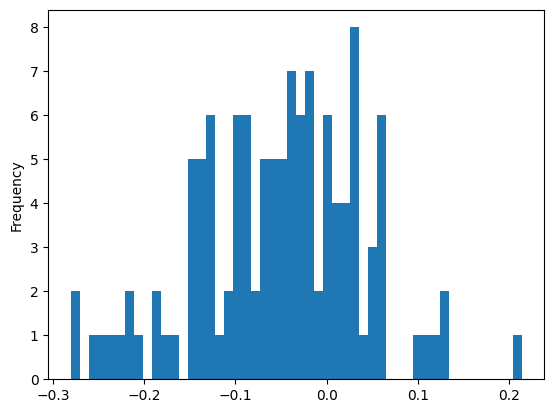

In [22]:
clfcta.Error.plot.hist(bins=50)

<Axes: ylabel='Frequency'>

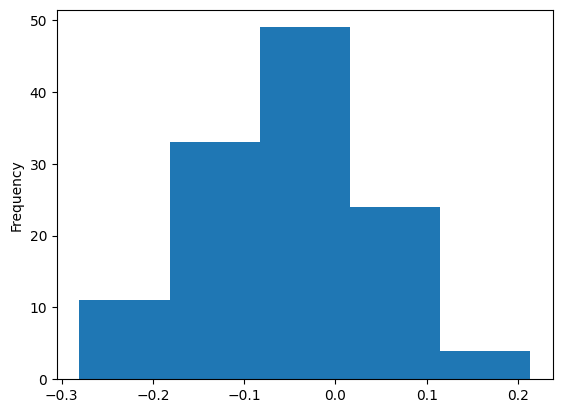

In [23]:
clfcta.Error.plot.hist(bins=5)

We see some overpredictions and underpredictions here (errors of close to -0.2 - -0.3 and errors of over 0.2). But most predictions are less than 0.1 off.

We can summarize the errors


In [24]:
clfcta.Error.describe()

,Error
count,121.000000
mean,-0.052835
std,0.090832
min,-0.280488
25%,-0.111111
50%,-0.044097
75%,0.010160
max,0.213602


In [25]:
clfcta.Error.median()

-0.044096728307254585

In statistics and machine learning, we want to use some summary metrics representing the overall error of prediction on the entire dataset (or on a specific subset).
We could start with **mean error**:

In [26]:
clfcta.Error.mean()

-0.05283511215641137

but we have a problem - errors can be positive and negative. One way to have a 0 mean error is to have, for example, 10 errors of -1 compensated by 10 errors of +1.
In order for us to understand the proper magnitude of an average error, we use a different metric called **Mean Absolute Error (MAE)**, which is computed as follows:

$$MAE= \frac{1}{n}\sum_{i=1}^n |y_i-\hat{y_i}|$$

Here, $n$ is the number of data points over which the error is computed, $y_i$ represent the actual values of the dependent variable, while $\hat{y_i}$ values represent the predictions of these values.


In [27]:
mae = clfcta.Error.abs().mean()

mae

0.08157406362074959

In statistics and machine learning two other measures of error are used: **Mean Squared Error(MSE)** and **Sum Squared Error (SSE)**, defined as follows:

$$SSE =  \sum_{i=1}^n (y_i - \hat{y_i})^2$$
$$MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y_i})^2$$

We can compute them as well


In [28]:
sse = (clfcta.Error **2).sum()
mse = (clfcta.Error **2).mean()

In [29]:
print("MAE =",mae)
print("SSE =",sse)
print("MSE =",mse)

MAE = 0.08157406362074959
SSE = 1.3278255543620234
MSE = 0.010973764912082839


Of these notions of error, it is useful to remember that `MAE` is the most intuitive as it represents the average error in the same units as the original units of the dependent variable.  At the same time, the `SSE` metric is **the most well-behaved** mathematically (as we discussed, for a variety of machine learning methods it is very important to work with fully differentiable functions, and while `MAE` is **not** fully differentiable, `SSE` is).

### Can we do better?

We have built one predictor, which, while reasonable, is also quite trivial - it uses the exact value of the dependent variable, unmodified, as a prediction for the dependent variable. The predictor is not perfect, as we get some error, but the error appears to be small.  In order to understand whether this predictor is actually good, let us search for predictors that **have a lower error**. For the sake of clarity of interpretation, we primarily use `MAE` as the error we are looking at, but we will be computing the `SSE` along the way (the reason will become apparent later).

In a typical machine learning exercise, the search for a better (best) predictor is done automatically. In our next lecture, we will discuss how this is done. Today though, we will conduct a manual search for a better predictor.  In order to start the search, let us revisit our visualization of the scatterplot for CTA vs CLF agreement.


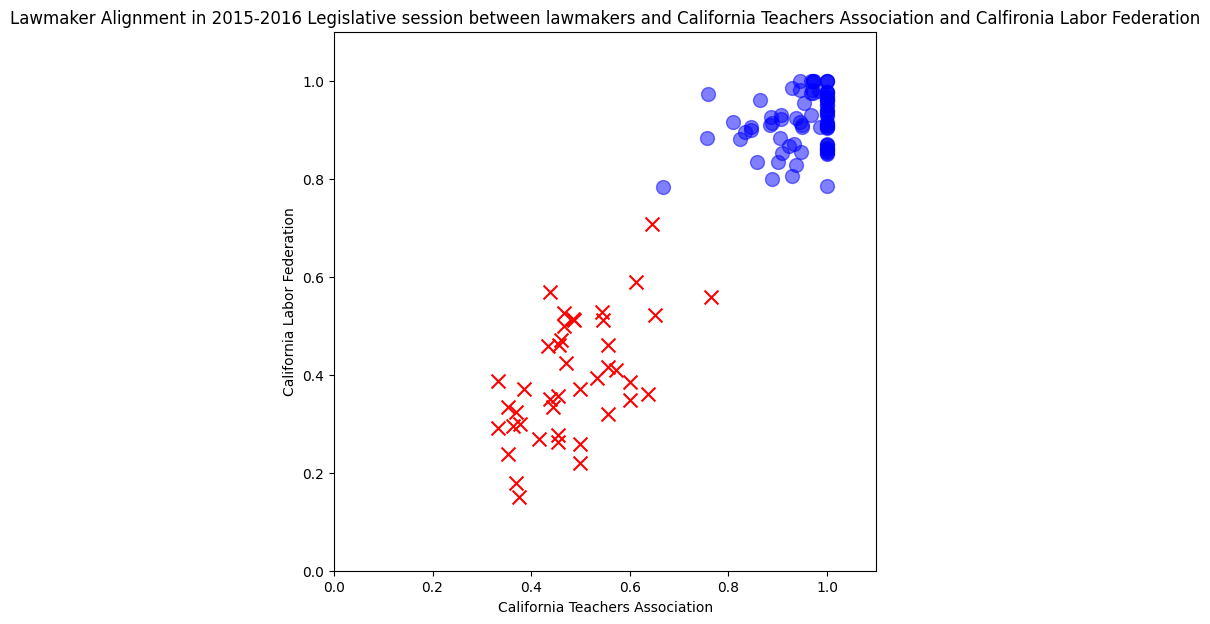

In [30]:
f2 = plt.figure(figsize=(7,7))  ### setting up the size of the figer
plt.scatter(x= aldf[aldf['Party']== 'Democrat'][cta], y=aldf[aldf['Party']=='Democrat'][clf], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican'][cta], y=aldf[aldf['Party']=='Republican'][clf], c="red", marker='x', s=100)

plt.xlim((0,1.1))  ## our values are no larger than 1.0, but we want to make sure our markers are not cut off
plt.ylim((0,1.1))
plt.xlabel('California Teachers Association')
plt.ylabel('California Labor Federation')
plt.title('Lawmaker Alignment in 2015-2016 Legislative session between lawmakers and California Teachers Association and Calfironia Labor Federation')
f2.show()


Our predictor functions take the shape of $$ \hat{CLF} = f(CTA)$$
In our first example, the `predictCLF()` function is identity:
$$ \hat{CLF} = CTA$$.

As any numeric function, it can be plotted.
To plot this function, we can deploy several methods. For example, we can sample the function in two locations: 0 and 1, and construct a line graph connecting these two locations

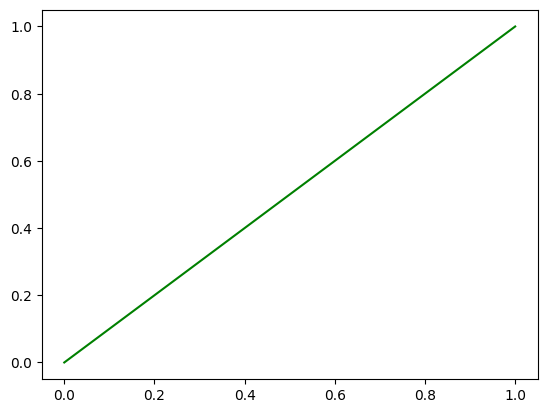

In [31]:
f3 = plt.figure()
myX = pd.Series([0,1])
myY = myX.apply(predictCLF)  ## well, we know that identity is returned, but we want our code to be generic
plt.plot(myX, myY, color = 'green')
f3.show()

Let's combine our plots now.

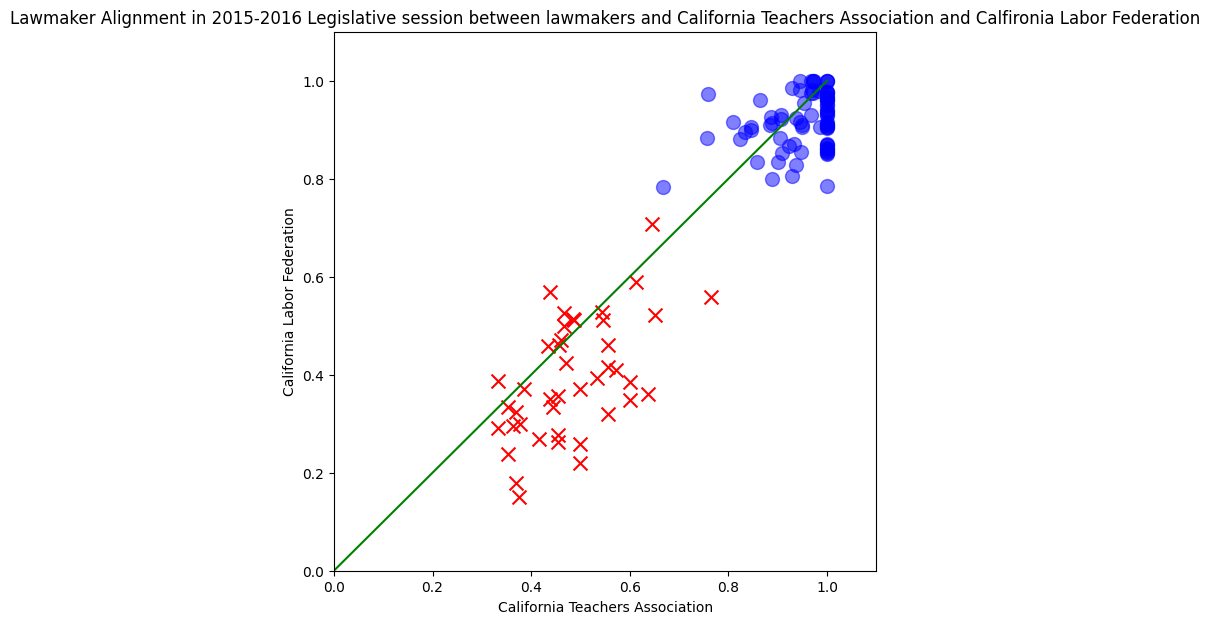

In [32]:
f4 = plt.figure(figsize=(7,7))  ### setting up the size of the figer
plt.scatter(x= aldf[aldf['Party']== 'Democrat'][cta], y=aldf[aldf['Party']=='Democrat'][clf], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican'][cta], y=aldf[aldf['Party']=='Republican'][clf], c="red", marker='x', s=100)


myX = pd.Series([0,1])
myY = myX.apply(predictCLF)  ## well, we know that identity is returned, but we want our code to be generic
plt.plot(myX, myY, color = 'green')

plt.xlim((0,1.1))  ## our values are no larger than 1.0, but we want to make sure our markers are not cut off
plt.ylim((0,1.1))

plt.xlabel('California Teachers Association')
plt.ylabel('California Labor Federation')
plt.title('Lawmaker Alignment in 2015-2016 Legislative session between lawmakers and California Teachers Association and Calfironia Labor Federation')
f4.show()


It seems like more points on the scatterplot are **below the predictor line**, which suggests to us that our prediction function tends to be overly optimistic and predicts a value that is higher than the true agreement with CLF most of the time.  To correct this, we can do one of the two things (and later - we can consider both).

* **one way to lower some errors** is to "lower" the predictor line. We can accomplish it by subtracting some number from the $\hat{y} = x$ predictor, turning it into a
$$\hat{y} = x - b$$  predictor for **some** value of $b$. What is the value of $b$ we want to settle on? Well, it should not be too large. Graphically, here is an effect of the constant add-on (intercept) on a predictor:



f5 = plt.figure(figsize=(7,7))  ### setting up the size of the figer
plt.scatter(x= aldf[aldf['Party']== 'Democrat'][cta], y=aldf[aldf['Party']=='Democrat'][clf], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican'][cta], y=aldf[aldf['Party']=='Republican'][clf], c="red", marker='x', s=100)


myX = pd.Series([0,1])
myY = myX.apply(predictCLF)  ## well, we know that identity is returned, but we want our code to be generic
plt.plot(myX, myY, color = 'green')

myX = pd.Series([0,1])
myY = myX.apply(predictCLF)  ## well, we know that identity is returned, but we want our code to be generic
plt.plot(myX, myY, color = 'green')
myY2 = myX-0.07
myY3 = myX-0.8

plt.plot(myX, myY2, color = 'black')
plt.plot(myX, myY3, color = 'orange')


plt.xlim((0,1.1))  ## our values are no larger than 1.0, but we want to make sure our markers are not cut off
plt.ylim((0,1.1))

plt.xlabel('California Teachers Association')
plt.ylabel('California Labor Federation')
plt.title('Lawmaker Alignment in 2015-2016 Legislative session between lawmakers and California Teachers Association and Calfironia Labor Federation')
f5.show()

* **another way to lower the errors/change the predictor**, is to modify the direction where the line is heading. In our case, the original predictor is too low, so we could try turning its graph representation clockwise.  This can be done by scaling the predictor using the following formula:
$$\hat{y} = k\cdot x$$

To get get the predictor line to point in the direction we want, we need to take a value of $k$ smaller than 1. How much smaller? well, let us calibrate again.

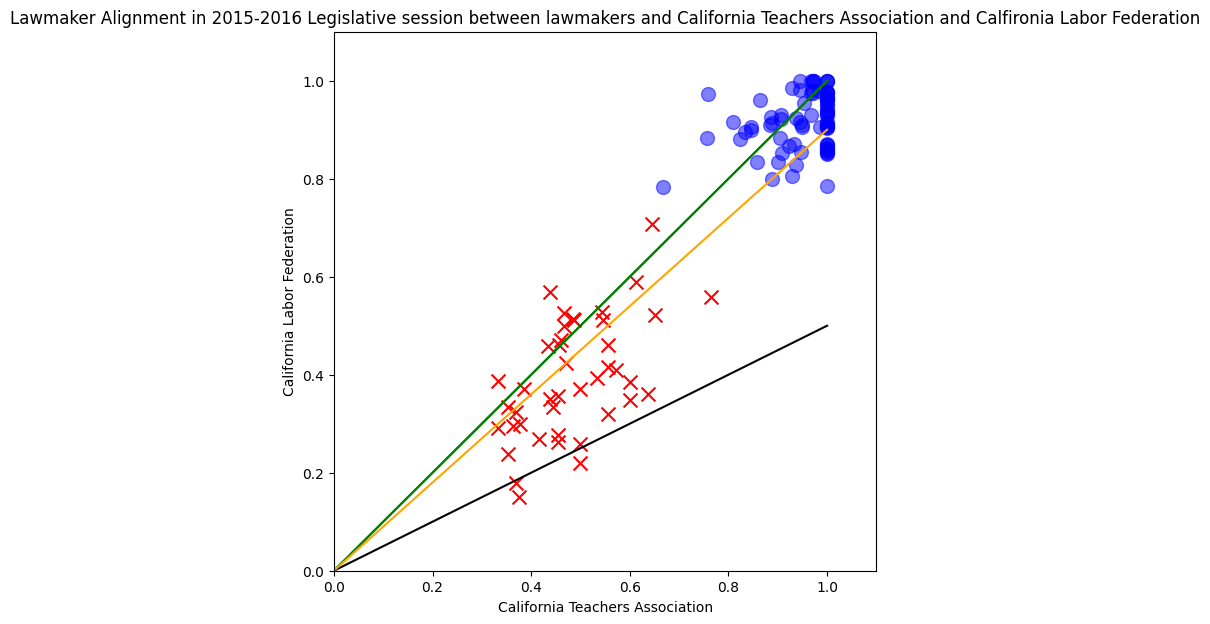

In [33]:
f6 = plt.figure(figsize=(7,7))  ### setting up the size of the figer
plt.scatter(x= aldf[aldf['Party']== 'Democrat'][cta], y=aldf[aldf['Party']=='Democrat'][clf], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican'][cta], y=aldf[aldf['Party']=='Republican'][clf], c="red", marker='x', s=100)


myX = pd.Series([0,1])
myY = myX.apply(predictCLF)  ## well, we know that identity is returned, but we want our code to be generic
plt.plot(myX, myY, color = 'green')

myX = pd.Series([0,1])
myY = myX.apply(predictCLF)  ## well, we know that identity is returned, but we want our code to be generic
plt.plot(myX, myY, color = 'green')
myY2 = myX * 0.5
myY3 = myX*0.9

plt.plot(myX, myY2, color = 'black')
plt.plot(myX, myY3, color = 'orange')


plt.xlim((0,1.1))  ## our values are no larger than 1.0, but we want to make sure our markers are not cut off
plt.ylim((0,1.1))

plt.xlabel('California Teachers Association')
plt.ylabel('California Labor Federation')
plt.title('Lawmaker Alignment in 2015-2016 Legislative session between lawmakers and California Teachers Association and Calfironia Labor Federation')
f6.show()

Finally, we, of course, can combine both "moves", and have a predictor that both changes the angle of the predictor line, and adjusts its vertical position on the graph. Such a predictor has the shape:
$$\hat{y} = k\cdot x + b$$
(we use the canonical form here, and add, rather than subtract a generic intercept $b$. Becasue values of `b` range from $-\infty$ to $+\infty$, we do not lose generality.

Let us see the effects of both tansformations on a couple of examples.

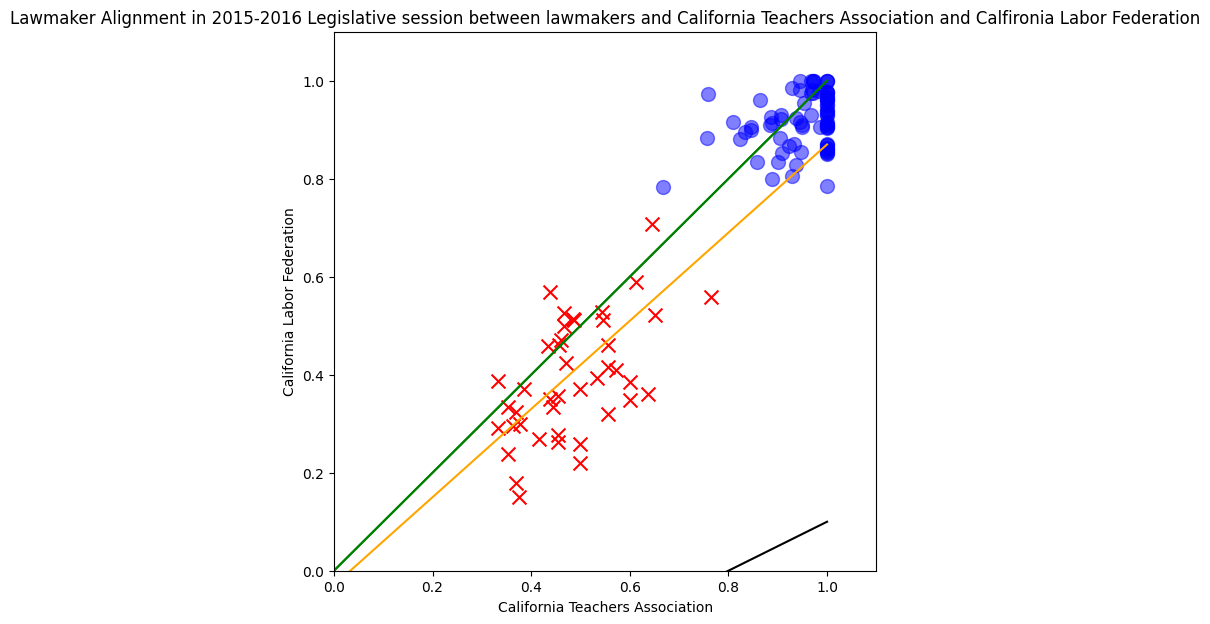

In [34]:
f6 = plt.figure(figsize=(7,7))  ### setting up the size of the figer
plt.scatter(x= aldf[aldf['Party']== 'Democrat'][cta], y=aldf[aldf['Party']=='Democrat'][clf], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican'][cta], y=aldf[aldf['Party']=='Republican'][clf], c="red", marker='x', s=100)


myX = pd.Series([0,1])
myY = myX.apply(predictCLF)  ## well, we know that identity is returned, but we want our code to be generic
plt.plot(myX, myY, color = 'green')

myX = pd.Series([0,1])
myY = myX.apply(predictCLF)  ## well, we know that identity is returned, but we want our code to be generic
plt.plot(myX, myY, color = 'green')
myY2 = myX * 0.5 -0.4
myY3 = myX*0.9 - 0.03

plt.plot(myX, myY2, color = 'black')
plt.plot(myX, myY3, color = 'orange')


plt.xlim((0,1.1))  ## our values are no larger than 1.0, but we want to make sure our markers are not cut off
plt.ylim((0,1.1))

plt.xlabel('California Teachers Association')
plt.ylabel('California Labor Federation')
plt.title('Lawmaker Alignment in 2015-2016 Legislative session between lawmakers and California Teachers Association and Calfironia Labor Federation')
f6.show()

Let us consider three predictors now:

In [35]:
## addotional predictors

def predictCLF02(cta):
    return cta - 0.07

def predictCLF03(cta):
    return 0.95*cta

def predictCLF04(cta):
    return 0.96*cta - 0.02



Let us generate predictions and compute errors for each of the predictors to see if any of them improves on the original predictor we constructed.

We can reproduce our process of prediction and computing the errors.

In [36]:
### here, let's use a loop!  We can do it w/o a loop, but let's use one anyway

for predictor,columnMod in zip([predictCLF02, predictCLF03, predictCLF04], ['02','03','04']):
    predictedColumn = 'Predicted'+columnMod
    clfcta[predictedColumn] = clfcta[cta].apply(predictor)    ### create the predictions
    errorColumn = 'Error'+columnMod
    clfcta[errorColumn]= clfcta[clf] - clfcta[predictedColumn]


<ipython-input-36-30538ad25a5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clfcta[predictedColumn] = clfcta[cta].apply(predictor)    ### create the predictions
<ipython-input-36-30538ad25a5c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clfcta[errorColumn]= clfcta[clf] - clfcta[predictedColumn]


In [37]:
clfcta

,Firstname,Lastname,Party,California Teachers Association,California Labor Federation,Predicted,Error,Predicted02,Error02,Predicted03,Error03,Predicted04,Error04
PID,,,,,,,,,,,,,
1,Isadore,Hall,Democrat,0.945946,0.981481,0.945946,0.035536,0.875946,0.105536,0.898649,0.082833,0.888108,0.093373
2,Richard,Bloom,Democrat,1.000000,0.860465,1.000000,-0.139535,0.930000,-0.069535,0.950000,-0.089535,0.940000,-0.079535
3,Susan,Bonilla,Democrat,1.000000,0.911111,1.000000,-0.088889,0.930000,-0.018889,0.950000,-0.038889,0.940000,-0.028889
4,Tony,Thurmond,Democrat,0.863636,0.960000,0.863636,0.096364,0.793636,0.166364,0.820455,0.139545,0.809091,0.150909
5,"K.H. ""Katcho""",Achadjian,Republican,0.600000,0.384615,0.600000,-0.215385,0.530000,-0.145385,0.570000,-0.185385,0.556000,-0.171385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,Sharon,Runner,Republican,0.368421,0.178571,0.368421,-0.189850,0.298421,-0.119850,0.350000,-0.171429,0.333684,-0.155113
4657,John,Moorlach,Republican,0.466667,0.525000,0.466667,0.058333,0.396667,0.128333,0.443333,0.081667,0.428000,0.097000
7492,Autumn,Burke,Democrat,0.888889,0.800000,0.888889,-0.088889,0.818889,-0.018889,0.844444,-0.044444,0.833333,-0.033333


Let us compare the errors:



In [39]:
errorColumns = ['Error', 'Error02', 'Error03', 'Error04']

mae =  clfcta[errorColumns].abs().mean()
sse =  (clfcta[errorColumns] * clfcta[errorColumns]).sum()  ### note how this properly squares every column due to the "magic" of broadcasting

In [ ]:
pd.DataFrame({"MAE":mae, "SSE":sse})

Of the four predictors explored, the fourth one:

$$\mbox{CLF} = 0.96\cdot \mbox{CTA} - 0.02$$ or
$$\hat{y} = 0.96\cdot x - 0.02$$

has both the smallest Mean Absolute Error and the smallest Sum Squared Error.  It is thus reasonable for us (if we wanted to stop here), to select the fourth predictor function as our **model for predicting the agreement between a Lawmaker and California Labor Federation based on the known agreement between the Lawmaker and California Teachers Union**.

### But how can we find the best predictor?

The manual process we investigated of constructing multiple predictors, computing the error of prediction over available data, and selecting the predictor with the lowest error among those we considered, is essentially how **most machine learning operates**, although, interestingly enough, specifically for our problem we can do better, and **find the best predictor of the shape**
$$\hat{y} = k\cdot x + b.$$

Here, by **the best predictor** we mean the predictor/model of the specific shape defined above, that has the **smallest possible error**.  As mentioned above, we will use `SSE`, i.e., the `Sum Squared Error` as our measurement of error when predicting.  The problem of finding a function
$$ \hat{y} = k\cdot x + b,$$ such that, given a set
$$D = \{(x_1,y_1), \ldots, (x_n,y_n)\}$$
of correpsonding pairs of values for independent and dependent variables (this set is called the **training set**), minimizes the error metric
$$\mbox{SSE} = \sum_{i=1}^n (y_i - \hat{y})^2$$
is known as a **Least Squares Linear Regression** problem.  The **"Least Squares"** part of the name refers to the error metric (we are trying to minimize the overall square error, i.e., looking for the "least squares"). The **Regression** part, as discussed above, means that we are predicting a quantitative dependent variable. Finally, $kx+b$ is a **linear function**. Whenever linear functions are used as our predictive models, we speak about **Linear Regression**.

**Linear Regression** is one of the simplest, but at the same time, very powerful regression techniques.  It is among the few techniques that allows for an exact solution - the optimization problem defined above can be solved _analytically_ and produce the values of $k$ and $b$ that yield
 a linear function hat optimizes the error.  Very few other Machine Learning methods come with analytical solutions.

 In the context of **linear models** of the shape $kx+b$, the two unknown values that determine the final shape of the model, $k$ and $b$ are referred to as **parameters**.  The process of finding the best model of a specific kind (e.g., finding the best linear model) is often called
 **model fit** or **fitting a model**, and results in an output that specifies the values of the parameters that produce a model with the smallest
 known error.  Often, the set of parameters itself: $(k,b)$ is reffered to as a **model**, as specifying all model parameters uniquely defines
 the underlying predictor function.


In the next lecture, we will discuss the exact solution, and how it is implemented in Python's `scikit-learn` package


## Where do we go from here?

Let us briefly discuss two extensions of the simple linear regression we looked at above.

### Extension 1: Multivariate Regression

Linear Regression models of the form $y=kx+b$ predict the value of the dependent variable based on a **single** independent variable value.

However,  in a typical scenario where prediction problems arise, there are often multiple independent variables available to be used for prediction.

Let us consider, for example, what happens if we look at the relationship between agreement with `Howard Jarvis Taxpayers Association` and `California Labor Federation` in addition to the agreement between `CTA` and `CLF` we studied above.

First, let us build the appropriate scattter plot.


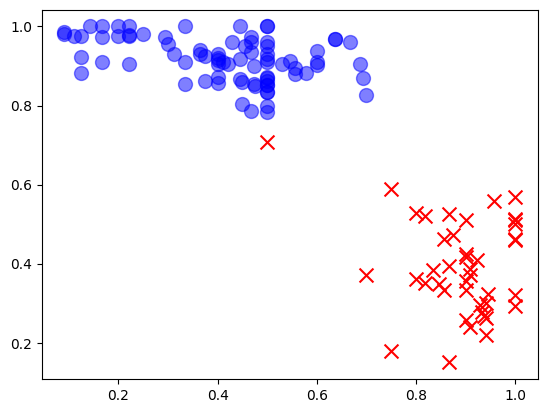

In [40]:
jarvis = 'Howard Jarvis Taxpayers Association'

fig7 = plt.figure()

plt.scatter(x= aldf[aldf['Party']== 'Democrat'][jarvis], y=aldf[aldf['Party']=='Democrat'][clf], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican'][jarvis], y=aldf[aldf['Party']=='Republican'][clf], c="red", marker='x', s=100)

plt.show()



This is a different trend, showing a distinct difference between behaviors of Democrats and Republicans, but not necessarily more predictive.
At the same  time, we can potentially use this information in conjunction with our `CTA` agreement data, and build **multifvariate** predictors.

In [41]:
## note that this function is differently strtuctured. It takes as input a Series object representing a single observation.
## from this observation it extracts the appropriate values of specific attributtes

def mvPredictorCLF(data):
   # print(data)
    cta = 'California Teachers Association'
    jarvis = 'Howard Jarvis Taxpayers Association'
    prediction = 0.75*data[cta] - 0.5*data[jarvis] + 0.4
    return prediction


In [43]:
aldf['MVPrediction']= aldf.apply(mvPredictorCLF, axis = 1)   ## axis =1 ensures that we are applying the function to row of the data frame

In [44]:
aldf['MVError'] = aldf[clf]- aldf['MVPrediction']

In [45]:
aldf

,California Labor Federation,California Immigrant Policy Center,California Teachers Association,Disability Rights California,Association Of California Water Agencies,Howard Jarvis Taxpayers Association,California Building Industry Association,Firstname,Lastname,Party,MVPrediction,MVError
PID,,,,,,,,,,,,
1,0.981481,0.900000,0.945946,0.807692,0.720000,0.250000,0.200000,Isadore,Hall,Democrat,0.984459,-0.002978
2,0.860465,0.947368,1.000000,0.800000,0.625000,0.450000,0.500000,Richard,Bloom,Democrat,0.925000,-0.064535
3,0.911111,0.955556,1.000000,0.809524,0.545455,0.411765,0.692308,Susan,Bonilla,Democrat,0.944118,-0.033007
4,0.960000,0.942308,0.863636,0.769231,0.625000,0.666667,0.428571,Tony,Thurmond,Democrat,0.714394,0.245606
5,0.384615,0.560000,0.600000,1.000000,0.750000,0.833333,1.000000,"K.H. ""Katcho""",Achadjian,Republican,0.433333,-0.048718
...,...,...,...,...,...,...,...,...,...,...,...,...
4656,0.178571,0.294118,0.368421,0.333333,0.714286,0.750000,0.769231,Sharon,Runner,Republican,0.301316,-0.122744
4657,0.525000,0.375000,0.466667,0.529412,0.760000,0.866667,0.809524,John,Moorlach,Republican,0.316667,0.208333
7492,0.800000,0.972222,0.888889,0.666667,0.727273,0.500000,0.750000,Autumn,Burke,Democrat,0.816667,-0.016667


Notice, that for some Lawmakers, this method produces very precise predictions.

<Axes: ylabel='Frequency'>

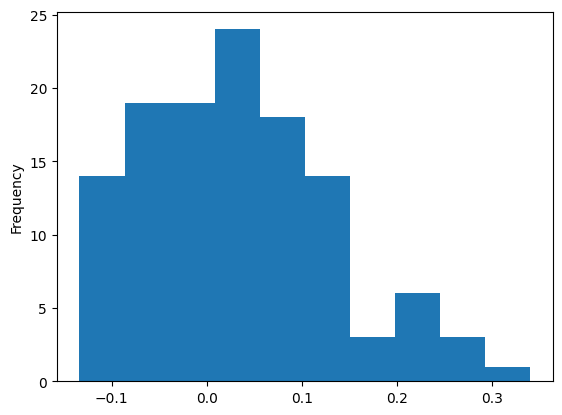

In [46]:
aldf['MVError'].plot.hist(bins=10)

In [47]:
mae = aldf['MVError'].abs().mean()
sse = (aldf['MVError'] **2).sum()

In [48]:
print("MAE:",mae)
print("SSE", sse)

MAE: 0.08243454094582356
SSE 1.324494246856888


We could try visualizing our predictor function in 3D, and we will eventually get there, but there is another good way of visualizing the behavior of the linear model, that is always a 2D plot. We can always plot the predicted values vs. the actual values, and see how different the relationship is from the straight $y=x$ line (which would represent perfect predictions.

In [49]:
aldf.columns

Index(['California Labor Federation', 'California Immigrant Policy Center',
       'California Teachers Association', 'Disability Rights California',
       'Association Of California Water Agencies',
       'Howard Jarvis Taxpayers Association',
       'California Building Industry Association', 'Firstname', 'Lastname',
       'Party', 'MVPrediction', 'MVError'],
      dtype='object')

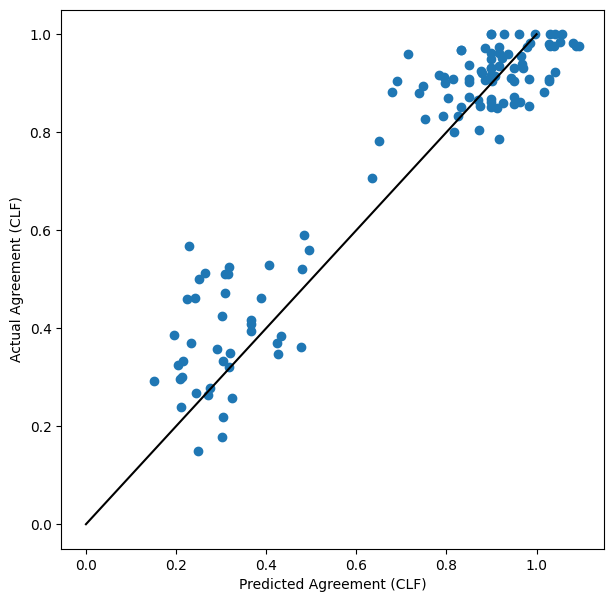

In [50]:

fig8 = plt.figure(figsize=(7,7))

plt.scatter(x=aldf['MVPrediction'], y=aldf[clf])
plt.plot([0,1],[0,1], color='black')

#plt.scatter(x= aldf[aldf['Party']== 'Democrat']['MVPrediction'], y=aldf[aldf[clf]=='Democrat'][clf], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
#plt.scatter(x= aldf[aldf['Party']=='Republican']['MVPrediction'], y=aldf[aldf[clf]=='Republican'][clf], c="red", marker='x', s=100)

plt.xlabel('Predicted Agreement (CLF)')
plt.ylabel('Actual Agreement (CLF)')

fig8.show()

These values are slightly worse than some of the **univariate predictors**, but we effectively just made a wild guess on a multivariate predictor model, and still got a decent result!

## Extension 2: Non-linear regression

Let us go back to that scatterplot of agreement with `Howard Jarvis Taxpayers Associatiation` and `Calfironia Labor Federation`

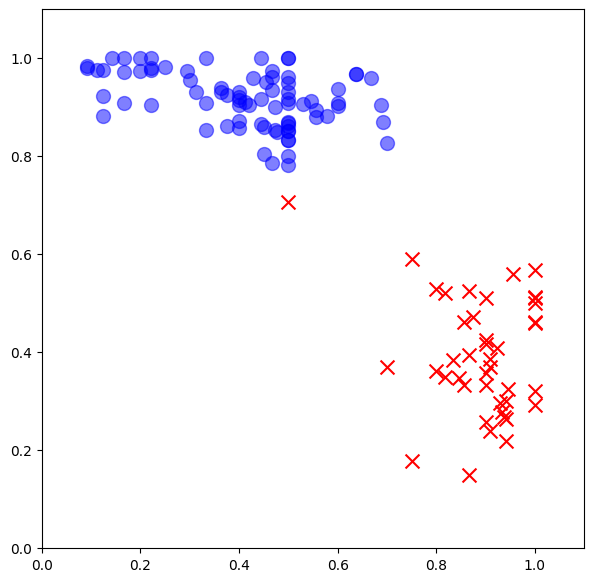

In [51]:
jarvis = 'Howard Jarvis Taxpayers Association'

fig7 = plt.figure(figsize = (7,7))

plt.scatter(x= aldf[aldf['Party']== 'Democrat'][jarvis], y=aldf[aldf['Party']=='Democrat'][clf], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican'][jarvis], y=aldf[aldf['Party']=='Republican'][clf], c="red", marker='x', s=100)

plt.xlim((0,1.1))
plt.ylim((0,1.1))


plt.show()


There is a relationship here, but is it linear?

Let us try a non-linear function. Something like $y = 1-x^2$, perhaps?

In [52]:
### this is a univariate predictor, but we will keep sending the endtire observation to the predictor function here

def predictorNL(data):
    jarvis = 'Howard Jarvis Taxpayers Association'
    prediction = 1- (data[jarvis]**2)
    return prediction


In [53]:
aldf['NLPrediction']= aldf.apply(predictorNL, axis = 1)   ## axis =1 ensures that we are applying the function to row of the data frame
aldf['NLError'] = aldf[clf]- aldf['NLPrediction']
maeNL = aldf['NLError'].abs().mean()
sseNL = (aldf['NLError'] **2).sum()

In [54]:
print("MAE:", maeNL)
print("SSE:", sseNL )

MAE: 0.15405205579501724
SSE: 4.874632247372224


Unlike linear functions, in order to draw a non-linear curve, we need to use a different trick.


In [57]:
vals = np.array(range(100))/100 + 0.01


squares = np.array([1-(x**2) for x in vals])

In [58]:
vals, squares

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
        0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
        0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
        0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
        0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
        0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
        0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
        0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
        0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
        1.  ]),
 array([0.9999, 0.9996, 0.9991, 0.9984, 0.9975, 0.9964, 0.9951, 0.9936,
        0.9919, 0.99  , 0.9879, 0.9856, 0.9831, 0.9804, 0.9775, 0.9744,
        0.9711, 0.9676, 0.9639, 0.96  , 0.9559, 0.9516, 0.9471, 0.9424,
        0.9375, 0.9324, 0.9271, 0.9216, 0.9159, 0.91  , 0.9039, 0.8976,
        0.8911, 0.8844, 0.8775

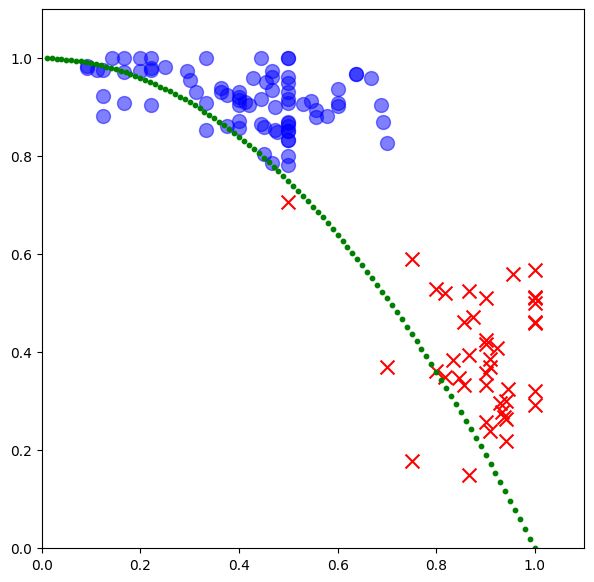

In [59]:


fig7 = plt.figure(figsize = (7,7))

plt.scatter(x= aldf[aldf['Party']== 'Democrat'][jarvis], y=aldf[aldf['Party']=='Democrat'][clf], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican'][jarvis], y=aldf[aldf['Party']=='Republican'][clf], c="red", marker='x', s=100)

plt.scatter(x = vals, y=squares, c='green', s=10)

plt.xlim((0,1.1))
plt.ylim((0,1.1))


plt.show()


Perhaps if we can stretch it a bit?

$ y = 1 - 0.6*x^2$

In [60]:
### this is a univariate predictor, but we will keep sending the endtire observation to the predictor function here

def predictorNL2(data):
    jarvis = 'Howard Jarvis Taxpayers Association'
    prediction = 1- 0.6* (data[jarvis]**2)
    return prediction


In [61]:
aldf['NLPrediction2']= aldf.apply(predictorNL2, axis = 1)   ## axis =1 ensures that we are applying the function to row of the data frame
aldf['NLError2'] = aldf[clf]- aldf['NLPrediction2']
maeNL = aldf['NLError2'].abs().mean()
sseNL = (aldf['NLError2'] **2).sum()

In [62]:
print("MAE:", maeNL)
print("SSE:", sseNL )

MAE: 0.09378725777784667
SSE: 1.9735284717324362


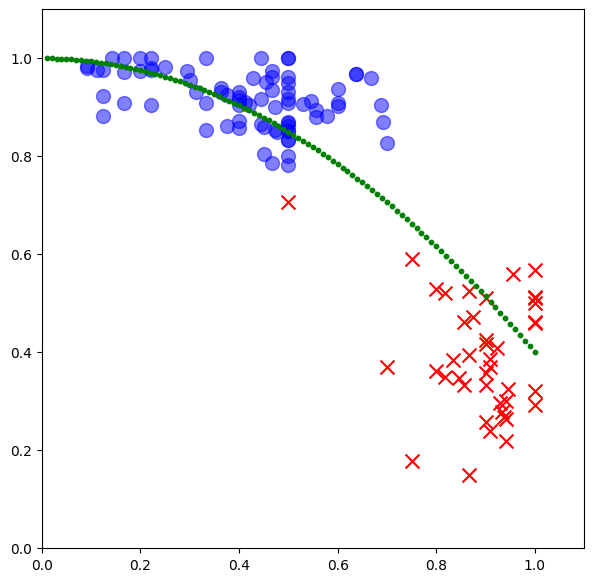

In [63]:
vals = np.array(range(100))/100 + 0.01
squares = np.array([1-0.6*(x**2) for x in vals])


fig7 = plt.figure(figsize = (7,7))

plt.scatter(x= aldf[aldf['Party']== 'Democrat'][jarvis], y=aldf[aldf['Party']=='Democrat'][clf], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican'][jarvis], y=aldf[aldf['Party']=='Republican'][clf], c="red", marker='x', s=100)

plt.scatter(x = vals, y=squares, c='green', s=10)

plt.xlim((0,1.1))
plt.ylim((0,1.1))


plt.show()



**Name**:___________________

**email:**_________________

**Section**: [ ]01   [ ]03

## Exercises

**Exercise 1**.  Build two scatterplots for the relationship between the lawmaker agreement with Howard Jarvis Taxpayers Association and their agreement with California Labor Federation. The first scatterplot shall distinguish between Republicans and Democrats.  The second scatterplot (note, you may have to go back to raw data for that) shall distinguish between members of the Senate and members of the Assembly.

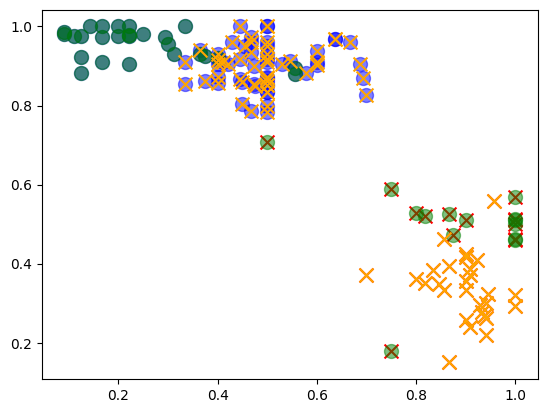

In [85]:
## code goes here. Use as many cells as you need
plt.scatter(x= aldf[aldf['Party']== 'Democrat'][jarvis], y=aldf[aldf['Party']=='Democrat'][clf], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican'][jarvis], y=aldf[aldf['Party']=='Republican'][clf], c="red", marker='x', s=100)

plt.scatter(x= aldf[aldf['Chamber']== 'Senate'][jarvis], y=aldf[aldf['Chamber']=='Senate'][clf], c="green", alpha=0.5, marker='o', s=100)
plt.scatter(x= aldf[aldf['Chamber']=='Assembly'][jarvis], y=aldf[aldf['Chamber']=='Assembly'][clf], c="orange", marker='x', s=100)




**Exercise 2**: Consider all possible univariate predictors for Lawmaker agreement with `Disability Rights of California`  (basically, use any other of the six agreement variables as independent variable). Let us consider a predictor **good** if the $MAE$ of the predictor is less than $0.1$.   See if you can find good **linear** univariate predictors for the agreement between lawmakers and `Disability Rights of California`.  Document any good predictor you find. If you cannot seem to find a good predictor, provide some written explanations for why you think it is the case.

Mean absolute error:  0.14341294340644795


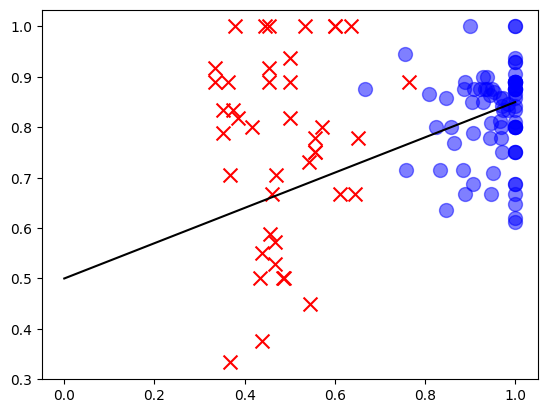

In [204]:
## CTA - DRC
plt.scatter(x= aldf[aldf['Party']== 'Democrat'][cta], y=aldf[aldf['Party']=='Democrat']["Disability Rights California"], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican'][cta], y=aldf[aldf['Party']=='Republican']["Disability Rights California"], c="red", marker='x', s=100)

def predictorDRC(input):
  return input * .35 + .5
myx = pd.Series([0,1])
myy = pd.Series([0,1])
myy = myy.apply(predictorDRC)

plt.plot(myx, myy, color='black')

cta_df = aldf
cta_df["Predicted"] = cta_df[clf].apply(predictorDRC)
cta_df["Error"] = cta_df[cta] - cta_df["Predicted"]
mae = cta_df.Error.abs().mean()
print("Mean absolute error: ", mae)

Mean absolute error:  0.17526678009719415


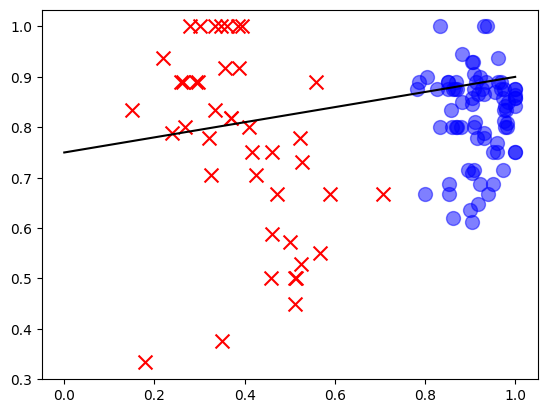

In [218]:
## CLF -> DRC
plt.scatter(x= aldf[aldf['Party']== 'Democrat'][clf], y=aldf[aldf['Party']=='Democrat']["Disability Rights California"], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican'][clf], y=aldf[aldf['Party']=='Republican']["Disability Rights California"], c="red", marker='x', s=100)

def predictorDRC(input):
  return input * .15 + .75
myx = pd.Series([0,1])
myy = pd.Series([0,1])
myy = myy.apply(predictorDRC)

plt.plot(myx, myy, color='black')

clf_df = aldf
clf_df["Predicted"] = clf_df[clf].apply(predictorDRC)
clf_df["Error"] = clf_df[clf] - clf_df["Predicted"]
mae = clf_df.Error.abs().mean()
print("Mean absolute error: ", mae)

Mean absolute error:  0.15979060760609715


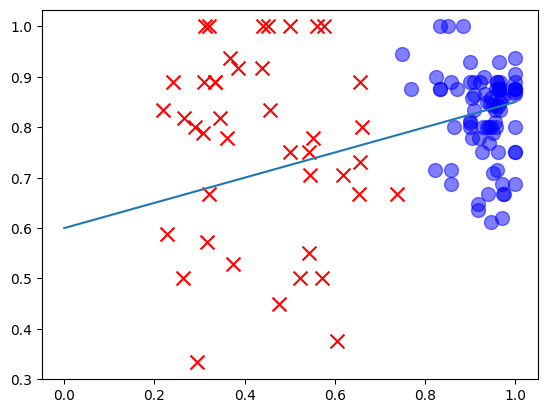

In [197]:
## Immigrant Policy Center -> DRC
plt.scatter(x= aldf[aldf['Party']== 'Democrat']["California Immigrant Policy Center"], y=aldf[aldf['Party']=='Democrat']["Disability Rights California"], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican']["California Immigrant Policy Center"], y=aldf[aldf['Party']=='Republican']["Disability Rights California"], c="red", marker='x', s=100)

def predictorDRC(input):
  return input * .25 + .6
myx = pd.Series([0,1])
myy = pd.Series([0,1])
myy = myy.apply(predictorDRC)

plt.plot(myx, myy)
cip_df = aldf
cip_df["Predicted"] = cip_df["California Immigrant Policy Center"].apply(predictorDRC)
cip_df["Error"] = cip_df["California Immigrant Policy Center"] - cip_df["Predicted"]
mae = cip_df.Error.abs().mean()
print("Mean absolute error: ", mae)

Mean absolute error:  0.10125417321799669


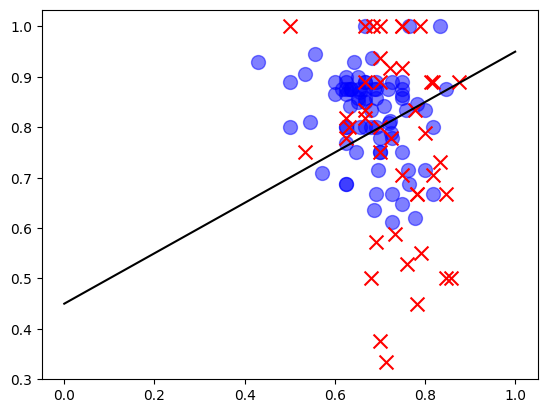

In [216]:
## Waterboards --> DRC

## Immigrant Policy Center -> DRC
plt.scatter(x= aldf[aldf['Party']== 'Democrat']["Association Of California Water Agencies"], y=aldf[aldf['Party']=='Democrat']["Disability Rights California"], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican']["Association Of California Water Agencies"], y=aldf[aldf['Party']=='Republican']["Disability Rights California"], c="red", marker='x', s=100)

def predictorDRC(input):
  return input * .5 + .45
myx = pd.Series([0,1])
myy = pd.Series([0,1])
myy = myx.apply(predictorDRC)

plt.plot(myx, myy, color='black')


acw_df = aldf
acw_df["Predicted"] = acw_df["Association Of California Water Agencies"].apply(predictorDRC)
acw_df["Error"] = acw_df["Association Of California Water Agencies"] - acw_df["Predicted"]
mae = acw_df.Error.abs().mean()
print("Mean absolute error: ", mae)

Mean absolute error:  0.22300289064020293


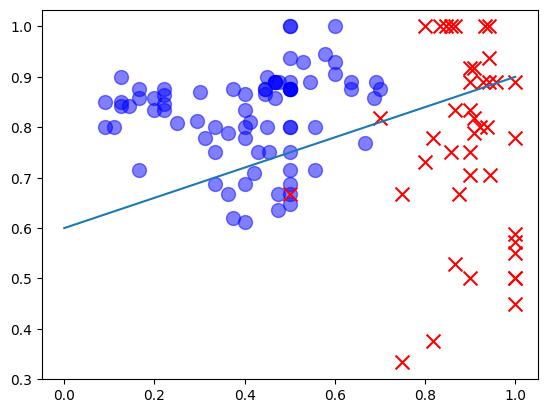

In [224]:
## Howard Jarvis -> DRC
plt.scatter(x= aldf[aldf['Party']== 'Democrat']["Howard Jarvis Taxpayers Association"], y=aldf[aldf['Party']=='Democrat']["Disability Rights California"], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican']["Howard Jarvis Taxpayers Association"], y=aldf[aldf['Party']=='Republican']["Disability Rights California"], c="red", marker='x', s=100)


def predictorDRC(input):
  return input * .3 + .6
myx = pd.Series([0,1])
myy = pd.Series([0,1])
myy = myy.apply(predictorDRC)

plt.plot(myx, myy)
how_df = aldf
how_df["Predicted"] = how_df["Howard Jarvis Taxpayers Association"].apply(predictorDRC)
how_df["Error"] = how_df["Howard Jarvis Taxpayers Association"] - how_df["Predicted"]
mae = how_df.Error.abs().mean()
print("Mean absolute error: ", mae)



Mean absolute error:  0.17385883870350846


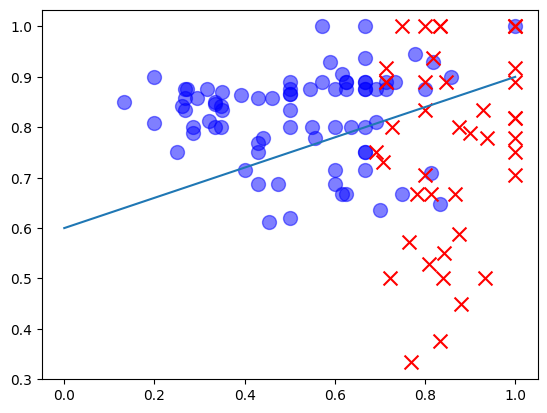

In [233]:
# Building Industry --> DRC
plt.scatter(x= aldf[aldf['Party']== 'Democrat']["California Building Industry Association"], y=aldf[aldf['Party']=='Democrat']["Disability Rights California"], c="blue", alpha=0.5, marker='o', edgecolor='blue', s=100)
plt.scatter(x= aldf[aldf['Party']=='Republican']["California Building Industry Association"], y=aldf[aldf['Party']=='Republican']["Disability Rights California"], c="red", marker='x', s=100)


def predictorDRC(input):
  return input * .3 + .6
myx = pd.Series([0,1])
myy = pd.Series([0,1])
myy = myy.apply(predictorDRC)

plt.plot(myx, myy)
bia_df = aldf
bia_df["Predicted"] = bia_df["California Building Industry Association"].apply(predictorDRC)
bia_df["Error"] = bia_df["California Building Industry Association"] - bia_df["Predicted"]
mae = bia_df.Error.abs().mean()
print("Mean absolute error: ", mae)



In [228]:
## use as many cells as you need.

**Exercise 3**.  Continuing our lecture investigation of Lawmaker agreement with `California Labor Federation`, make conjectures about whether relationships between each other individual independent variable and Agreement with `CLF` are linear or non-linear. In case of conjectured non-linear relationships, attempt to construct a non-linear regression model (stick to simpler ones, like quadratic functions, or logarithms, if needed) that has good performance.

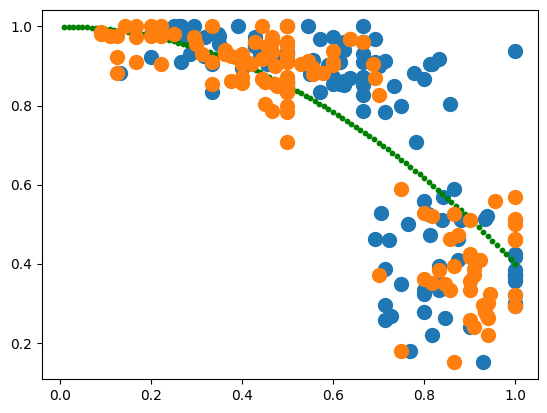

In [239]:
plt.scatter(x= aldf["California Building Industry Association"], y=aldf[clf], s=100) # NON Linear
vals = np.array(range(100))/100 + 0.01
squares = np.array([1-0.6*(x**2) for x in vals])
plt.scatter(x = vals, y=squares, c='green', s=10)


plt.scatter(x= aldf["Howard Jarvis Taxpayers Association"], y=aldf[clf], s=100) # NON Linear

